In [20]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb # Import the CAMB module
from camb.symbolic import get_scalar_temperature_sources

# CMB Parameter Sensitivity

The Standard Cosmological Model, i. e. the $\Lambda CDM$ model, is based on six foundamental parameters:
- $A_s$
- $n_s$
- $\tau$: optical depth of the Universe, i.e. it accounts for how likely a photon may scatter in his path;
- $H_0$: value of the Hubble constant at the present epoch;
- $\Omega_bh^2$
- $\Omega_ch^2$

In [21]:
# Set up a new set of parameters for CAMB using Planck 2018 cosmological parameters
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')


In [22]:
# Calculate results for these parameters
results = camb.get_results(pars)

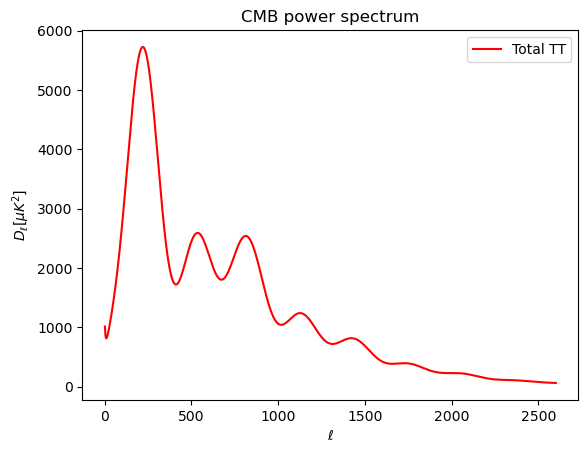

In [23]:
# Plot the CMB temperature power spectrum
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total'] # Get the total CMB power spectrum
ells = np.arange(totCL.shape[0])

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') # Taking from l=2 since l=0,1 are not physical
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()


Note that TT stands for Temperature - Temperature: it describes how the temperature fluctuations in the CMB are distributed across different angular scales. Essentially, it quantifies the variation in temperature as a function of scale.

Recall that:
$$
D_l = \frac{l(l+1)C_l}{2\pi}
$$

# WARNING

In [24]:
# Monopole and dipole aren't 0 by default????
print('Monopole:', totCL[0,0])
print('Dipole:', totCL[1,0])

Monopole: 0.0
Dipole: 0.0


In [25]:
# Getting all the C_ls for the temperature power spectrum
C_l = results.get_cmb_power_spectra(pars, raw_cl=True)


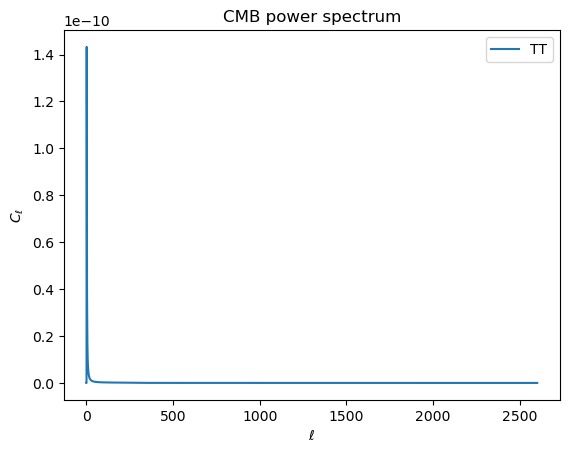

In [34]:
C_ls = C_l['total']

# Plotting the C_ls
plt.figure()
plt.plot(ells, C_ls[:,0], label='TT')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.title('CMB power spectrum')
plt.show()


In [35]:
# Contribution from ISW effect
pars1 = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

pars1.SourceTerms.counts_ISW = False

In [28]:
results1 = camb.get_results(pars1)
powers1 = results1.get_cmb_power_spectra(pars1, CMB_unit='muK')
totCL1=powers1['total'] # Get the total CMB power spectrum

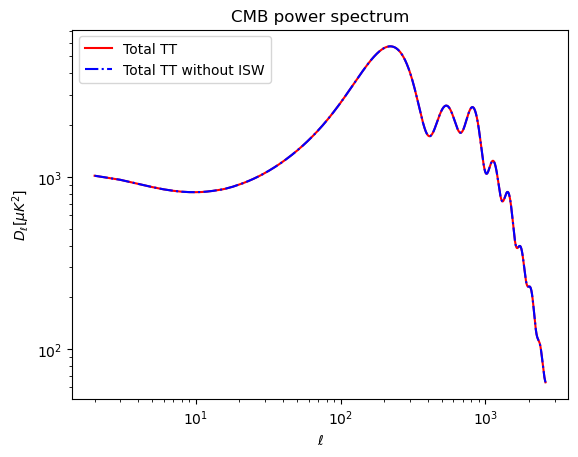

In [29]:
# Plot the CMB power spectrum VS the one without ISW effect
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') 
plt.plot(ells[2:],totCL1[2:,0], color='b',ls = '-.',label='Total TT without ISW')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [30]:
mono, ISW, dipo, quadru = get_scalar_temperature_sources()

In [31]:
mono

(Delta_g(t)/4 + 2*phi(t) + eta(t)/(2*Kf_1))*visibility(t)

In [32]:
dipo

((sigma(t) + v_b(t))*Derivative(visibility(t), t) + (Derivative(sigma(t), t) + Derivative(v_b(t), t))*visibility(t))/k

In [33]:
mono = np.array(source_term[0,:])
ISW = np.array(source_term[1,:])
dipo = np.array(source_term[2,:])


# Plotting monopole, ISW, dipole and quadrupole
plt.figure()
plt.plot(ells[2:], mono[2:], color='r', label='Monopole')
plt.plot(ells[2:], ISW[2:], color='b', label='ISW')
plt.plot(ells[2:], dipo[2:], color='g', label='Dipole')
plt.plot(ells[2:], quadru[2:], color='y', label='Quadrupole')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB extra features')
#plt.xscale('log')
#plt.yscale('log')
#plt.show()

NameError: name 'source_term' is not defined